In [1]:
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "how many dogs are in the picture?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True).strip())


C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:58<00:00, 29.28s/it]


In [8]:
question = "how many dogs are in the picture?"
inputs = processor(raw_image, question, return_tensors="pt")

In [9]:
out = model.generate(**inputs)

In [6]:
raw_image.show()

In [17]:
out[0][1]

tensor(50118)

In [4]:
processor.decode(out[0], skip_special_tokens=False).strip()

'</s>'

In [3]:
import torch
import requests
from PIL import Image

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load sample image
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [4]:
import torch
from lavis.models import load_model_and_preprocess
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

In [7]:
question = "Which city is this photo taken?"
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")

['los angeles']

In [9]:
raw_image = Image.open('test.png').convert('RGB')

In [26]:
question = "is picture about a dog?"
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")

['no']

In [29]:
model_img, vis_processors_fe, txt_processors_fx = load_model_and_preprocess(name="blip_retrieval", model_type="coco", is_eval=True, device=device)

C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 3.44G/3.44G [06:00<00:00, 10.3MB/s] 


In [32]:
image = vis_processors_fe["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
model_img.extr

IndexError: too many indices for tensor of dimension 4

In [1]:
import torch
from PIL import Image
import open_clip
model_img, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model_img.eval()

C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [6]:
import requests
img_url = 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png'
img1 = Image.open('test.png').convert('RGB')
img2 = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')



In [7]:
from img_same import  ImageSamer
img_samer = ImageSamer()
img_samer.get_score(img1, img2)

C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


0.24710898101329803

In [8]:
import requests
import json

def post_workflow_run(id, input_data):
    base_url = "https://api.workflowchef.ai"
    api_key = "qqr_16505d26c9a653c8b31bd713438969656aa2b04bf64586e296b3d635ff62462e1604c1fc4081995667b356daad3e5b3c"
    
    url = f"{base_url}/api/workflow_runs/"
    headers = {
        'Authorization': f'Bearer {api_key}',
        'Content-Type': 'application/json'
    }
    payload = {
        'workflow_id': id,
        'input': input_data
    }

    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code
        workflow_run = response.json()
        return workflow_run
    except requests.exceptions.RequestException as e:
        print(e)
        return {
            'message': 'Workflow run failed',
            'status': 404
        }

# Example usage
workflow_id = '1c9fed59-dc11-47af-8678-73131c9dfcc7'
input_data = {'question': "You are a task judge, your task is determine input image is relevant with task or not to avoid fake task. for example if task description is 'Lift all box to floor 7' and image is about a dog, then image is not relevant with task then reason why it is not relevant and suggest to take a relevant image. and you answer in Json format 'result': 'no' and 'reason': 'image about dog and not relevant with task' and 'suggest': 'let's take image about stack of box need to lift'. If relevant result return yes and the price you think it deserve for who do this task with description context in image example 'result': 'yes' and 'price': 10 . Now description is 'clean the table'.",
              'image_url': 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png'}
result = post_workflow_run(workflow_id, input_data)
print(result)

{'id': 'ce132e48-046b-4456-a071-4cd166a0ac1c', 'workflow_id': '1c9fed59-dc11-47af-8678-73131c9dfcc7', 'workflow_config_override': {'nodes': [{'name': 'response', 'title': 'describe_image', 'description': 'Describe image content', 'node_type_name': 'describe_image', 'input_config': {'model': 'OpenAI GPT-4o', 'prompt': '{{question}}', 'image_url': '{{image_url}}'}, 'output_mapping': None}], 'output_mapping': {}, 'input_schema': {'type': 'object', 'title': 'User inputs', 'required': [], 'properties': {'question': {'type': 'string', 'title': 'question', 'description': 'Uknown description', 'ui_metadata': {'type': 'short_text', 'order': 0, 'max_size': None, 'min_size': None, 'max_width': None, 'min_width': None, 'ref_image': None, 'max_height': None, 'media_type': None, 'min_height': None, 'allowed_mime_types': None}}, 'image_url': {'type': 'string', 'title': 'Img', 'description': 'Uknown description', 'ui_metadata': {'type': 'short_text', 'order': 0, 'max_size': None, 'min_size': None, 'ma

In [28]:
import httpx
import asyncio
import json

async def post_workflow_run(id, input_data):
    base_url = "https://api.workflowchef.ai"
    api_key = "qqr_16505d26c9a653c8b31bd713438969656aa2b04bf64586e296b3d635ff62462e1604c1fc4081995667b356daad3e5b3c"
    
    url = f"{base_url}/api/workflow_runs/"
    headers = {
        'Authorization': f'Bearer {api_key}',
        'Content-Type': 'application/json'
    }
    payload = {
        'workflow_id': id,
        'input': input_data
    }

    async with httpx.AsyncClient() as client:
        try:
            response = await client.post(url, headers=headers, json=payload)
            response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code
            workflow_run = response.json()
            return workflow_run
        except httpx.RequestError as e:
            print(e)
            return {
                'message': 'Workflow run failed',
                'status': 404
            }

# Example usage
async def put_job():
    workflow_id = '1c9fed59-dc11-47af-8678-73131c9dfcc7'
    input_data = {'question': "You are a task judge, your task is determine input image is relevant with task or not to avoid fake task. for example if task description is 'Lift all box to floor 7' and image is about a dog, then image is not relevant with task then reason why it is not relevant and suggest to take a relevant image. and you answer in Json format 'result': 'no' and 'reason': 'image about dog and not relevant with task' and 'suggest': 'let's take image about stack of box need to lift'. If relevant result return yes and the price you think it deserve for who do this task with description context in image example 'result': 'yes' and 'price': 10 and 'context': 'The image shows a table with some items on it, suggesting that it needs cleaning.' . Now description is 'clean the table'.",
              'img_url': 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png'}
    result = await post_workflow_run(workflow_id, input_data)
    return result

# Run the example
job_details = await put_job()


In [29]:
job_details

{'id': '0d79fab0-f303-4937-90cb-43a4d35df7de',
 'workflow_id': '1c9fed59-dc11-47af-8678-73131c9dfcc7',
 'workflow_config_override': {'nodes': [{'name': 'describe_image',
    'title': 'describe_image',
    'description': 'Describe image content',
    'node_type_name': 'describe_image',
    'input_config': {'model': 'OpenAI GPT-4o',
     'prompt': '{{question}}',
     'image_url': '{{img_url}}'},
    'output_mapping': None}],
  'output_mapping': {},
  'input_schema': {'type': 'object',
   'title': 'User inputs',
   'required': [],
   'properties': {'img_url': {'type': 'string',
     'title': 'Img',
     'description': 'Uknown description',
     'ui_metadata': {'type': 'short_text',
      'order': 0,
      'max_size': None,
      'min_size': None,
      'max_width': None,
      'min_width': None,
      'ref_image': None,
      'max_height': None,
      'media_type': None,
      'min_height': None,
      'allowed_mime_types': None}},
    'question': {'type': 'string',
     'title': 'questi

In [31]:
async def get_workflow_run(id):
    base_url = "https://api.workflowchef.ai"
    api_key = "qqr_16505d26c9a653c8b31bd713438969656aa2b04bf64586e296b3d635ff62462e1604c1fc4081995667b356daad3e5b3c"
    
    url = f"{base_url}/api/workflow_runs/{id}"
    headers = {
        'Authorization': f'Bearer {api_key}'
    }

    async with httpx.AsyncClient() as client:
        try:
            response = await client.get(url, headers=headers)
            response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code
            workflow = response.json()
            return workflow
        except httpx.RequestError as e:
            print(e)
            return {
                'message': 'Workflow run not found',
                'status': 404
            }

In [66]:
async def call_workflow_api(question, img_url):
    workflow_id = '1c9fed59-dc11-47af-8678-73131c9dfcc7'
    input_data = {'question': question, 'img_url': img_url}
    result = await post_workflow_run(workflow_id, input_data)
    w_id = result['id']
    while True:
        workflow = await get_workflow_run(w_id)
        if workflow['status'] == 'success':
            return workflow
        await asyncio.sleep(5)
    return result

In [67]:
result = await call_workflow_api("You are a task judge, your task is determine input image is relevant with task or not to avoid fake task. for example if task description is 'Lift all box to floor 7' and image is about a dog, then image is not relevant with task then reason why it is not relevant and suggest to take a relevant image. and you answer in Json format 'result': 'no' and 'reason': 'image about dog and not relevant with task' and 'suggest': 'let's take image about stack of box need to lift'. If relevant result return yes and the price you think it deserve for who do this task with description context in image example 'result': 'yes' and 'price': 10 and 'context': 'The image shows a table with some items on it, suggesting that it needs cleaning.' . Now description is 'clean the table'.", 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png')

In [68]:
result

{'id': '6e9ea2f2-3eb5-438a-b06b-5f16d04a7d5f',
 'workflow_id': '1c9fed59-dc11-47af-8678-73131c9dfcc7',
 'workflow_config_override': {'nodes': [{'name': 'describe_image',
    'title': 'describe_image',
    'description': 'Describe image content',
    'node_type_name': 'describe_image',
    'input_config': {'model': 'OpenAI GPT-4o',
     'prompt': '{{question}}',
     'image_url': '{{img_url}}'},
    'output_mapping': None}],
  'output_mapping': {},
  'input_schema': {'type': 'object',
   'title': 'User inputs',
   'required': [],
   'properties': {'img_url': {'type': 'string',
     'title': 'Img',
     'description': 'Uknown description',
     'ui_metadata': {'type': 'short_text',
      'order': 0,
      'max_size': None,
      'min_size': None,
      'max_width': None,
      'min_width': None,
      'ref_image': None,
      'max_height': None,
      'media_type': None,
      'min_height': None,
      'allowed_mime_types': None}},
    'question': {'type': 'string',
     'title': 'questi

In [69]:
import json
def ouput_extractor(result):
    result = result['output']
    result = result['content'].strip('```json\n')
    result = result.replace('\n', '')
    return json.loads(result)

In [70]:
# parse the output from str to dict
output = ouput_extractor(result)

In [71]:
output

{'result': 'no',
 'reason': 'image is a form requiring address details and is not relevant with task',
 'suggest': "let's take an image of a table that needs cleaning"}

In [74]:
from PIL import Image

#hstack 2 images
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('test.png')
img2 = cv2.imread('test3.png')
img1 = cv2.resize(img1, (300, 300))
img2 = cv2.resize(img2, (300, 300))
hstack = np.hstack((img1, img2))
cv2.imwrite('hstack.png', hstack)

True

In [ ]:
import boto3
from botocore.exceptions import NoCredentialsError

# Initialize the S3 client with explicit credentials
s3 = boto3.client(
    's3',
    aws_access_key_id='your_access_key_id',
    aws_secret_access_key='your_secret_access_key',
    region_name='your_region'  # Optional
)

# Parameters
bucket_name = 'keeper-storage'
object_key = 'path/to/your/object.txt'
file_content = 'This is the content of the file.'

try:
    # Put the object into the S3 bucket
    s3.put_object(Bucket=bucket_name, Key=object_key, Body=file_content)
    print(f"File uploaded successfully to {bucket_name}/{object_key}")
except NoCredentialsError:
    print("Credentials not available")
except Exception as e:
    print(f"An error occurred: {e}")

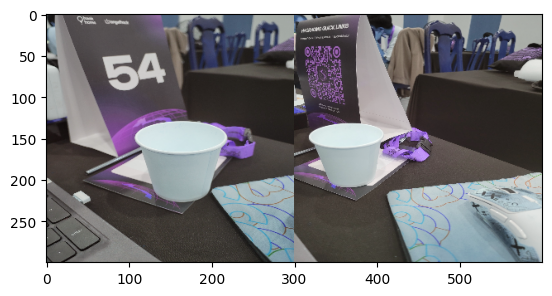

In [73]:
plt.imshow(hstack)

In [ ]:
result2 = await call_workflow_api("You are a task judge, your task is determine input image is relevant with task or not to avoid fake task. for example if task description is 'Lift all box to floor 7' and image is about a dog, then image is not relevant with task then reason why it is not relevant and suggest to take a relevant image. and you answer in Json format 'result': 'no' and 'reason': 'image about dog and not relevant with task' and 'suggest': 'let's take image about stack of box need to lift'. If relevant result return yes and the price you think it deserve for who do this task with description context in image example 'result': 'yes' and 'price': 10 and 'context': 'The image shows a table with some items on it, suggesting that it needs cleaning.' . Now description is 'clean the table'.", 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png')

In [1]:
from s3_services import S3Services
s3 = S3Services()


In [2]:
s3.upload_image('test.png')

'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/test.png'

In [3]:
s3.upload_image('test2.png')

'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/test2.png'

In [4]:
s3.upload_image('test3.png')

'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/test3.png'

In [5]:
s3.upload_image('hstack.png')

'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/hstack.png'

In [15]:
description = "clean the table"
img_url = 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png'
input_data = {'question': f"""
You are a task judge. Your task is to determine whether the input image is relevant to the given task description to avoid fake tasks.
For example:
Task description: "Lift all boxes to floor 7"
If the image shows a dog, the image is not relevant. Your response should explain why it is not relevant and suggest taking a relevant image.
{{
  "result": "no",
  "reason": "The image shows a dog and is not relevant to the task.",
  "suggest": "Let's take an image of the stack of boxes that need to be lifted."
}}
If the image is relevant, return a positive result with the price you think the task deserves based on the context shown in the image.
{{
  "result": "yes",
  "price": 10,
  "context": "The image shows a table with some items on it, suggesting that it needs cleaning."
}}
Now, here is the description for the task: {description}.""",

                    'img_url': img_url}

In [16]:
input_data

{'question': '\nYou are a task judge. Your task is to determine whether the input image is relevant to the given task description to avoid fake tasks.\nFor example:\nTask description: "Lift all boxes to floor 7"\nIf the image shows a dog, the image is not relevant. Your response should explain why it is not relevant and suggest taking a relevant image.\n{\n  "result": "no",\n  "reason": "The image shows a dog and is not relevant to the task.",\n  "suggest": "Let\'s take an image of the stack of boxes that need to be lifted."\n}\nIf the image is relevant, return a positive result with the price you think the task deserves based on the context shown in the image.\n{\n  "result": "yes",\n  "price": 10,\n  "context": "The image shows a table with some items on it, suggesting that it needs cleaning."\n}\nNow, here is the description for the task: clean the table.',
 'img_url': 'https://keeper-storage.s3.ap-southeast-1.amazonaws.com/img/image.png'}

In [ ]:
import base64
import io
def stack_images(img1, img2):
    img1 = cv2.resize(img1, (300, 300))
    img2 = cv2.resize(img2, (300, 300))
    hstack = np.hstack((img1, img2))
    return hstack
def read_image(image_path):
    img = cv2.imread(image_path)
    # Convert the image from BGR color (OpenCV default) to RGB color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
def base64_to_image(base64_string):
    img = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img))
    img = np.array(img)
    return img
def base64_to_cv2(base64_string):
    img = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    return img
def write_image(image, image_path):
    cv2.imwrite(image_path, image)
